In [1]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


import prepare as pr 


In [167]:
df = pr.prep_data('all_books.csv')

In [168]:
save = df.copy()

In [169]:
save.head(1)

,title,summary,year_published,author,review_count,number_of_ratings,length,genre,rating,reviews,cleaned_title,cleaned_summary,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,Alice's Adventures in Wonderland: A Pop-Up Ada...,Alice's Adventures in Wonderland is Robert Sa...,2003,Robert Sabuda,157,26214,12.0,Classics,4.34,[],alice's adventures in wonderland a popup adapt...,alice's adventures in wonderland is robert sa...,False,alice adventure wonderland robert sabuda amaze...,0.0,0.627,0.373,0.9718,very positive


In [170]:
# df = save

# Clean DataFrame for Modeling

In [173]:
df['genre'] = df.genre.astype('object')

In [174]:
df = df.drop(columns= ['title','summary','year_published','author','reviews','cleaned_title','cleaned_summary'])

In [176]:
dummy_df = pd.get_dummies(df[['genre','sentiment']], dummy_na=False, drop_first=[True, True])
col_list = dummy_df.columns.tolist()

In [184]:
df = pd.concat([df, dummy_df],axis= 1)

In [185]:
df

,review_count,number_of_ratings,length,genre,rating,successful,lemmatized_summary,neg,neutral,pos,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,157,26214,12.0,Classics,4.34,False,alice adventure wonderland robert sabuda amaze...,0.000,0.627,0.373,...,0,0,0,0,0,0,0,0,0,1
1,62,19212,24.0,Childrens,4.25,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,...,0,0,0,0,0,0,0,0,0,1
2,531,9155,25.0,Horror,4.01,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,...,0,0,0,0,0,0,0,0,0,0
3,701,17358,26.0,Picture Books,4.13,False,flock hapless sheep drive country rhyme picture,0.167,0.833,0.000,...,0,0,0,0,0,0,0,0,0,0
4,50,15889,28.0,Childrens,4.00,False,note beverly cleary guide teacher accompany ti...,0.000,0.809,0.191,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,6016,54070,1408.0,Mystery,4.12,False,latest installment highly acclaim internationa...,0.143,0.806,0.051,...,0,0,0,0,0,0,0,0,1,0
3851,8425,199251,1443.0,Historical Fiction,4.25,False,year war come jamie frasers wife tell little w...,0.130,0.798,0.072,...,0,0,0,0,0,0,0,0,1,0
3852,15480,308202,1700.0,Classics,4.15,False,tolstoy epic masterpiece intertwine life priva...,0.087,0.781,0.132,...,0,0,0,0,0,0,0,0,0,1
3853,179,9045,2904.0,Classics,4.22,False,firmly ground hallmark strength norton antholo...,0.000,0.874,0.126,...,0,0,0,0,0,0,0,0,0,1


In [182]:
df

,review_count,number_of_ratings,length,genre,rating,successful,lemmatized_summary,neg,neutral,pos,compound,sentiment
0,157,26214,12.0,Classics,4.34,False,alice adventure wonderland robert sabuda amaze...,0.000,0.627,0.373,0.9718,very positive
1,62,19212,24.0,Childrens,4.25,False,take bath big job mercer mayer famous little c...,0.008,0.781,0.211,0.9811,very positive
2,531,9155,25.0,Horror,4.01,False,rat wall short lovecraft write augustseptember...,0.015,0.985,0.000,-0.1779,negative
3,701,17358,26.0,Picture Books,4.13,False,flock hapless sheep drive country rhyme picture,0.167,0.833,0.000,-0.3400,negative
4,50,15889,28.0,Childrens,4.00,False,note beverly cleary guide teacher accompany ti...,0.000,0.809,0.191,0.8570,very positive
...,...,...,...,...,...,...,...,...,...,...,...,...
3849,6016,54070,1408.0,Mystery,4.12,False,latest installment highly acclaim internationa...,0.143,0.806,0.051,-0.9437,very negative
3851,8425,199251,1443.0,Historical Fiction,4.25,False,year war come jamie frasers wife tell little w...,0.130,0.798,0.072,-0.7239,very negative
3852,15480,308202,1700.0,Classics,4.15,False,tolstoy epic masterpiece intertwine life priva...,0.087,0.781,0.132,0.7430,very positive
3853,179,9045,2904.0,Classics,4.22,False,firmly ground hallmark strength norton antholo...,0.000,0.874,0.126,0.8176,very positive


# split

In [95]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection


In [96]:
def split(df, target):
    train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df[target])
    return train, test

In [97]:
train, test = split(df,'successful')

In [98]:
x_train =  train.drop(columns= "successful")
y_train = train['successful']

In [99]:
x_test = test.drop(columns= "successful")
y_test = test['successful']

In [202]:
x_train = x_train.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)

In [203]:

x_test = x_test.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)

# creating a min max scaler

In [205]:
xtrainnum = x_train.select_dtypes(exclude= ['string','object'])

In [206]:
xtrainnum = xtrainnum.drop(columns = ['neg','pos','neutral','compound'])

In [207]:
xtrainnum

,review_count,number_of_ratings,length,rating,genre_Business,genre_Chick Lit,genre_Childrens,genre_Christian,genre_Classics,genre_Comics,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,12558,116363,310.0,3.71,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,9,38,32.0,3.82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3371,153866,323.0,3.96,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2680,63466,293.0,3.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11,79,130.0,4.47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2052,28572,353.0,4.16,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
734,26711,511652,229.0,3.53,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
735,1002,18369,280.0,4.27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
736,31042,922768,320.0,4.36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
xtrainnum = xtrainnum[['review_count','number_of_ratings','length','rating']]

In [209]:
import sklearn.preprocessing

In [243]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(xtrainnum)


StandardScaler()

In [244]:
number_ls = xtrainnum.columns.tolist()

In [245]:
number_ls

['review_count', 'number_of_ratings', 'length', 'rating']

In [246]:
x_train_scaled = scaler.transform(x_train[number_ls])
x_test_scaled = scaler.transform(x_test[number_ls])

In [247]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= [number_ls])
x_test_scaled = pd.DataFrame(x_test_scaled, columns= [number_ls])

In [248]:
x_train[['neg','neutral','pos','compound']]

,neg,neutral,pos,compound
0,0.147,0.717,0.136,-0.0644
1,0.234,0.702,0.064,-0.9918
2,0.180,0.664,0.156,-0.9259
3,0.126,0.818,0.056,-0.8074
4,0.185,0.591,0.224,0.1531
...,...,...,...,...
2943,0.030,0.720,0.250,0.9849
2944,0.125,0.788,0.087,-0.7436
2945,0.105,0.796,0.099,-0.6124
2946,0.000,0.901,0.099,0.9153


In [249]:
x_train_scaled[['neg','neutral','pos','compound']] = x_train[['neg','neutral','pos','compound']].reset_index(drop = True)

In [254]:
x_train_scaled

,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,-0.472791,-0.322874,0.039140,-0.393078,0.147,0.717,0.136,-0.0644,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.436369,-0.347805,0.352410,1.961993,0.234,0.702,0.064,-0.9918,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.413854,-0.323556,0.813101,0.138712,0.180,0.664,0.156,-0.9259,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.434524,-0.347706,0.002285,0.100727,0.126,0.818,0.056,-0.8074,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.242344,-0.237197,-0.255702,-0.507033,0.185,0.591,0.224,0.1531,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,-0.390341,-0.341579,-1.213940,-0.317108,0.030,0.720,0.250,0.9849,0,0,...,0,0,0,0,0,0,0,0,0,1
2944,6.235392,3.210703,0.297127,2.227888,0.125,0.788,0.087,-0.7436,0,0,...,0,0,0,0,0,0,0,0,1,0
2945,0.324439,-0.020416,0.006892,0.556547,0.105,0.796,0.099,-0.6124,0,0,...,0,0,0,0,0,0,0,0,1,0
2946,-0.423843,-0.307491,0.333982,-0.013228,0.000,0.901,0.099,0.9153,0,0,...,0,0,0,0,0,0,0,0,0,1


In [251]:
x_test_scaled[['neg','neutral','pos','compound']] = x_test[['neg','neutral','pos','compound']]

In [252]:
tc = train[comb]

# create dummies

In [253]:
x_train_scaled = pd.concat([x_train_scaled, x_train[comb]],axis = 1 )

In [256]:
x_test_scaled = pd.concat([x_test_scaled, x_test[comb]],axis = 1 )

In [263]:
x_train_scaled.head(1) 

,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,-0.472791,-0.322874,0.03914,-0.393078,0.147,0.717,0.136,-0.0644,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
x_test_scaled.head(1)

,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,0.456529,0.007394,-0.301771,-1.152778,0.031,0.797,0.172,0.9647,0,0,...,0,0,0,0,0,0,0,0,0,1


In [307]:
x_train_scaled[important_feats]

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,-0.472791,-0.322874,0.039140,-0.393078,0.147,0.717,0.136,-0.0644,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.436369,-0.347805,0.352410,1.961993,0.234,0.702,0.064,-0.9918,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.413854,-0.323556,0.813101,0.138712,0.180,0.664,0.156,-0.9259,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.434524,-0.347706,0.002285,0.100727,0.126,0.818,0.056,-0.8074,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.242344,-0.237197,-0.255702,-0.507033,0.185,0.591,0.224,0.1531,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,-0.390341,-0.341579,-1.213940,-0.317108,0.030,0.720,0.250,0.9849,0,0,...,0,0,0,0,0,0,0,0,0,1
2944,6.235392,3.210703,0.297127,2.227888,0.125,0.788,0.087,-0.7436,0,0,...,0,0,0,0,0,0,0,0,1,0
2945,0.324439,-0.020416,0.006892,0.556547,0.105,0.796,0.099,-0.6124,0,0,...,0,0,0,0,0,0,0,0,1,0
2946,-0.423843,-0.307491,0.333982,-0.013228,0.000,0.901,0.099,0.9153,0,0,...,0,0,0,0,0,0,0,0,0,1


# XGBOOST 

# import CV

In [276]:

from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics as m
from sklearn.model_selection import cross_val_score

In [277]:
# Whatever transformations we apply to X_train need to be applied to X_test
# create an instance with predetermined values 
xgb_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 5,
                                        learning_rate = .01,
                                        subsample = .9,
                                        colsample_bytree = .5,
                                        n_jobs = 10)

In [278]:
cross_val_score(xgb_clf, x_train_scaled, y_train, cv = 5)

array([0.96101695, 0.96271186, 0.95762712, 0.95585739, 0.95585739])

In [284]:
def th_hyperparam_tuning(x_train, y_train, x_test, y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees):
    for max_depth in max_depths:
        for scale_pos_weight in scale_pos_weights:
            for learning_rate in learning_rates:
                for subsample in subsamples:
                    for colsample_bytree in colsample_bytrees:
                        # define the XGBClassifier with the current hyperparameters
                        xgb_model = xgb.XGBClassifier(objective ='binary:logistic', 
                                                  seed=42,
                                                  max_depth=max_depth,
                                                  scale_pos_weight=scale_pos_weight,
                                                  learning_rate=learning_rate,
                                                  subsample=subsample,
                                                  colsample_bytree=colsample_bytree,
                                                  n_jobs=10)
                        # fit the model on the training set
                        xgb_model.fit(x_train, y_train)
                        # predict on the test set
                        y_pred = xgb_model.predict(x_test)
                        # print the hyperparameters and the resulting f1-score
                        print(f"max_depth={max_depth}, scale_pos_weight={scale_pos_weight}, learning_rate={learning_rate}, subsample={subsample}, colsample_bytree={colsample_bytree}: f1-score={f1_score(y_test, y_pred)},: recall-score={recall_score(y_test, y_pred)}")
                        print('\n')
                        # print the confusion matrix
                        print(confusion_matrix(y_test, y_pred))
                        print('\n')
                        

In [285]:
max_depths = [3, 5, 7]
scale_pos_weights = [3, 5, 7]
learning_rates = [0.01, 0.1, 1]
subsamples = [0.7, 0.8, 0.9]
colsample_bytrees = [0.5, 0.6, 0.7]

In [ ]:
max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.5: f1-score=0.3880597014925374,: recall-score=0.40625


In [ ]:
max_depth=3, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.6: f1-score=0.4225352112676056,: recall-score=0.46875


[[682  24]
 [ 17  15]]

In [306]:



th_hyperparam_tuning(x_train_scaled[important_feats], y_train, x_test_scaled[important_feats], y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.5: f1-score=0.0,: recall-score=0.0


[[706   0]
 [ 32   0]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.6: f1-score=0.11764705882352941,: recall-score=0.0625


[[706   0]
 [ 30   2]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.7, colsample_bytree=0.7: f1-score=0.16666666666666666,: recall-score=0.09375


[[705   1]
 [ 29   3]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.5: f1-score=0.0,: recall-score=0.0


[[706   0]
 [ 32   0]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.6: f1-score=0.16666666666666666,: recall-score=0.09375


[[705   1]
 [ 29   3]]


max_depth=3, scale_pos_weight=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.7: f1-score=0.16666666666666666,: recall-score=0.09375


[[705   1]
 [ 29   3]]


max_depth=3, scale_pos_weig

max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.5: f1-score=0.3137254901960784,: recall-score=0.25


[[695  11]
 [ 24   8]]


max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.6: f1-score=0.2641509433962264,: recall-score=0.21875


[[692  14]
 [ 25   7]]


max_depth=3, scale_pos_weight=5, learning_rate=1, subsample=0.9, colsample_bytree=0.7: f1-score=0.25925925925925924,: recall-score=0.21875


[[691  15]
 [ 25   7]]


max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.5: f1-score=0.3333333333333333,: recall-score=0.25


[[698   8]
 [ 24   8]]


max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.6: f1-score=0.4262295081967213,: recall-score=0.40625


[[690  16]
 [ 19  13]]


max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.7, colsample_bytree=0.7: f1-score=0.4615384615384615,: recall-score=0.46875


[[688  18]
 [ 17  15]]


max_de

max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.7, colsample_bytree=0.7: f1-score=0.19999999999999998,: recall-score=0.15625


[[693  13]
 [ 27   5]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.5: f1-score=0.19047619047619047,: recall-score=0.125


[[700   6]
 [ 28   4]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.6: f1-score=0.21739130434782608,: recall-score=0.15625


[[697   9]
 [ 27   5]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.8, colsample_bytree=0.7: f1-score=0.2978723404255319,: recall-score=0.21875


[[698   8]
 [ 25   7]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.9, colsample_bytree=0.5: f1-score=0.2641509433962264,: recall-score=0.21875


[[692  14]
 [ 25   7]]


max_depth=5, scale_pos_weight=3, learning_rate=1, subsample=0.9, colsample_bytree=0.6: f1-score=0.34615384615384615,: recall-score=0.28125


[[695  11]
 [ 23   9]]


max_dept

max_depth=5, scale_pos_weight=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.6: f1-score=0.39999999999999997,: recall-score=0.375


[[690  16]
 [ 20  12]]


max_depth=5, scale_pos_weight=7, learning_rate=0.1, subsample=0.9, colsample_bytree=0.7: f1-score=0.37288135593220334,: recall-score=0.34375


[[690  16]
 [ 21  11]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.5: f1-score=0.24489795918367344,: recall-score=0.1875


[[695  11]
 [ 26   6]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.6: f1-score=0.3157894736842105,: recall-score=0.28125


[[690  16]
 [ 23   9]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.7, colsample_bytree=0.7: f1-score=0.3076923076923077,: recall-score=0.25


[[694  12]
 [ 24   8]]


max_depth=5, scale_pos_weight=7, learning_rate=1, subsample=0.8, colsample_bytree=0.5: f1-score=0.3396226415094339,: recall-score=0.28125


[[694  12]
 [ 23   9]]


max_depth

max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.5: f1-score=0.35555555555555557,: recall-score=0.25


[[701   5]
 [ 24   8]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.6: f1-score=0.44000000000000006,: recall-score=0.34375


[[699   7]
 [ 21  11]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7: f1-score=0.375,: recall-score=0.28125


[[699   7]
 [ 23   9]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.5: f1-score=0.391304347826087,: recall-score=0.28125


[[701   5]
 [ 23   9]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.6: f1-score=0.3333333333333333,: recall-score=0.25


[[698   8]
 [ 24   8]]


max_depth=7, scale_pos_weight=5, learning_rate=0.1, subsample=0.9, colsample_bytree=0.7: f1-score=0.4489795918367347,: recall-score=0.34375


[[700   6]
 [ 21  11]]


max_depth=7, sca

In [ ]:
# based on the most important feats
max_depth=3, scale_pos_weight=7, learning_rate=0.01, subsample=0.9, colsample_bytree=0.7: f1-score=0.4444444444444445,: recall-score=0.5


[[682  24]
 [ 16  16]]

In [290]:
# create an instance with predetermined values 
clf_xgb = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 5,
                                        learning_rate = .01,
                                        subsample = .9,
                                        colsample_bytree = .5,
                                        n_jobs = 10)

In [292]:
clf_xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=10, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [294]:
clf_xgb.feature_importances_

array([0.10706209, 0.14391436, 0.0563195 , 0.05070722, 0.03722677,
       0.0383594 , 0.03182706, 0.0266741 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04669446,
       0.0527713 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05773534, 0.        , 0.        , 0.        ,
       0.13585968, 0.07239079, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03914009, 0.        ,
       0.        , 0.        , 0.        , 0.00232934, 0.        ,
       0.        , 0.        , 0.046776  , 0.        , 0.        ,
       0.04739108, 0.00682146], dtype=float32)

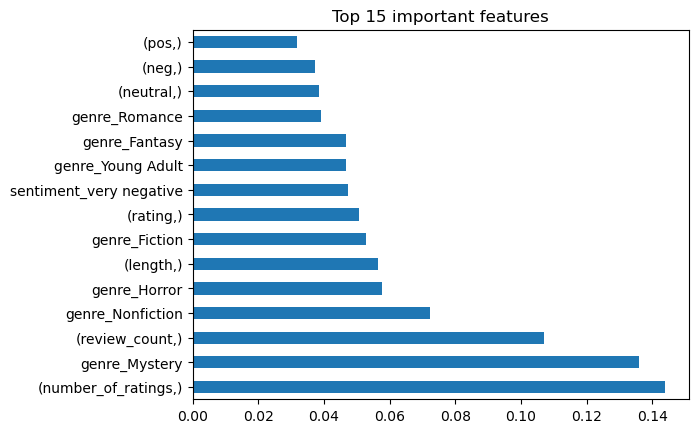

In [298]:
feat_importances = pd.Series(clf_xgb.feature_importances_, index= x_train_scaled.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()


In [304]:
x_train_scaled[important_feats]

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,"(review_count,)","(number_of_ratings,)","(length,)","(rating,)","(neg,)","(neutral,)","(pos,)","(compound,)",genre_Business,genre_Chick Lit,...,genre_Short Stories,genre_Thriller,genre_Travel,genre_Urban Fantasy,genre_Vampires,genre_Young Adult,sentiment_neutral,sentiment_positive,sentiment_very negative,sentiment_very positive
0,-0.472791,-0.322874,0.039140,-0.393078,0.147,0.717,0.136,-0.0644,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.436369,-0.347805,0.352410,1.961993,0.234,0.702,0.064,-0.9918,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.413854,-0.323556,0.813101,0.138712,0.180,0.664,0.156,-0.9259,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.434524,-0.347706,0.002285,0.100727,0.126,0.818,0.056,-0.8074,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.242344,-0.237197,-0.255702,-0.507033,0.185,0.591,0.224,0.1531,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,-0.390341,-0.341579,-1.213940,-0.317108,0.030,0.720,0.250,0.9849,0,0,...,0,0,0,0,0,0,0,0,0,1
2944,6.235392,3.210703,0.297127,2.227888,0.125,0.788,0.087,-0.7436,0,0,...,0,0,0,0,0,0,0,0,1,0
2945,0.324439,-0.020416,0.006892,0.556547,0.105,0.796,0.099,-0.6124,0,0,...,0,0,0,0,0,0,0,0,1,0
2946,-0.423843,-0.307491,0.333982,-0.013228,0.000,0.901,0.099,0.9153,0,0,...,0,0,0,0,0,0,0,0,0,1


In [303]:
important_feats = feat_importances.index.tolist()

In [ ]:

feat_importances




stop


In [271]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pr.prep_data('all_books.csv') 

In [ ]:
data = df.copy()

# NLP

# fit train

In [ ]:
#

In [288]:

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import f1_score




In [ ]:
y_pred = tree.predict(x_bow)

In [ ]:
# Calculate the recall score
recall = recall_score(y_train, y_pred, pos_label='best seller')
print("Recall score for 'best seller' class:", recall)
# print("Recall score on training data:", recall)

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay(
confusion_matrix = confusion_matrix(y_train, y_pred), 
display_labels = ['unsuccessful', 'best seller'])


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# assume y_train and y_train_pred are your target variable and predicted labels, respectively
# and y_test and y_pred are your test set target variable and predicted labels, respectively
fig, ax = plt.subplots(1, 2)
ax[0].set_title("train")
ax[1].set_title("test")

# plot confusion matrix for training data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred),
                       display_labels=['unsuccessful', 'best seller']).plot(ax=ax[0])

# plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred),
                       display_labels=['unsuccessful', 'best seller']).plot(ax=ax[1])

plt.show()

In [ ]:
# assume y_test and y_pred are your test set target variable and predicted labels, respectively
cm = confusion_matrix(y_train, y_pred)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['best', 'unsuccessful'])
disp.plot()
disp.ax_.set_title("Confusion Matrix for Test Data")

plt.show()

In [ ]:
# create an instance with predetermined values 
clf_xgb = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 5,
                                        learning_rate = .01,
                                        subsample = .9,
                                        colsample_bytree = .5,
                                        n_jobs = 10)

In [ ]:
label_encoder = LabelEncoder()


In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

vectorizer = CountVectorizer()
x_bow_train = vectorizer.fit_transform(x_train)
x_bow_test = vectorizer.transform(x_test)

In [ ]:
# create an instance with predetermined values 
xgb = xgb.XGBClassifier(objective ='binary:logistic', 
                                        seed = 42,
                                        max_depth = 3,    
                                        scale_pos_weight= 5,
                                        learning_rate = .01,
                                        subsample = .9,
                                        colsample_bytree = .5,
                                        n_jobs = 10)



In [ ]:
xgb.fit(x_bow_train, y_train)

In [ ]:
# make predictions on test set
y_pred = xgb.predict(x_bow_train)

# evaluate classifier performance
accuracy = xgb.score(x_bow_train, y_train)
print("Accuracy:", accuracy)

In [ ]:
# assume y_test and y_pred are your test set target variable and predicted labels, respectively
cm = confusion_matrix(y_train, y_pred)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['best', 'unsuccessful'])
disp.plot()
disp.ax_.set_title("Confusion Matrix for Test Data")

plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


In [ ]:
def th_hyperparam_tuning(x_train, y_train, x_test, y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees):
    for max_depth in max_depths:
        for scale_pos_weight in scale_pos_weights:
            for learning_rate in learning_rates:
                for subsample in subsamples:
                    for colsample_bytree in colsample_bytrees:
                        # define the XGBClassifier with the current hyperparameters
                        xgb_model = XGBClassifier(objective ='binary:logistic', 
                                                  seed=42,
                                                  max_depth=max_depth,
                                                  scale_pos_weight=scale_pos_weight,
                                                  learning_rate=learning_rate,
                                                  subsample=subsample,
                                                  colsample_bytree=colsample_bytree,
                                                  n_jobs=10)
                        # fit the model on the training set
                        xgb_model.fit(x_train, y_train)
                        # predict on the test set
                        y_pred = xgb_model.predict(x_test)
                        # print the hyperparameters and the resulting f1-score
                        print(f"max_depth={max_depth}, scale_pos_weight={scale_pos_weight}, learning_rate={learning_rate}, subsample={subsample}, colsample_bytree={colsample_bytree}: f1-score={f1_score(y_test, y_pred)},: recall-score={recall_score(y_test, y_pred)}")
                        print('\n')
                        # print the confusion matrix
                        print(confusion_matrix(y_test, y_pred))
                        print('\n')
                        

In [ ]:
max_depths = [3, 5, 7]
scale_pos_weights = [3, 5, 7]
learning_rates = [0.01, 0.1, 1]
subsamples = [0.7, 0.8, 0.9]
colsample_bytrees = [0.5, 0.6, 0.7]

th_hyperparam_tuning(x_bow_train, y_train, x_bow_test, y_test, max_depths, scale_pos_weights, learning_rates, subsamples, colsample_bytrees)